In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Usamos las librerías de sympy para que Python tenga los Out más visibles
from sympy import init_printing
#init_printing sirve para que Python nos conteste con un texto bonito
from IPython.display import Math, Latex
#De hecho, con la línea anterior le decmois a Python que nos conteste en Latex
from sympy.abc import x, epsilon, alpha
# El modulo sympy.abc exporta las letras griegos y romanos 

2.2344969487553255 2.2627756906819614


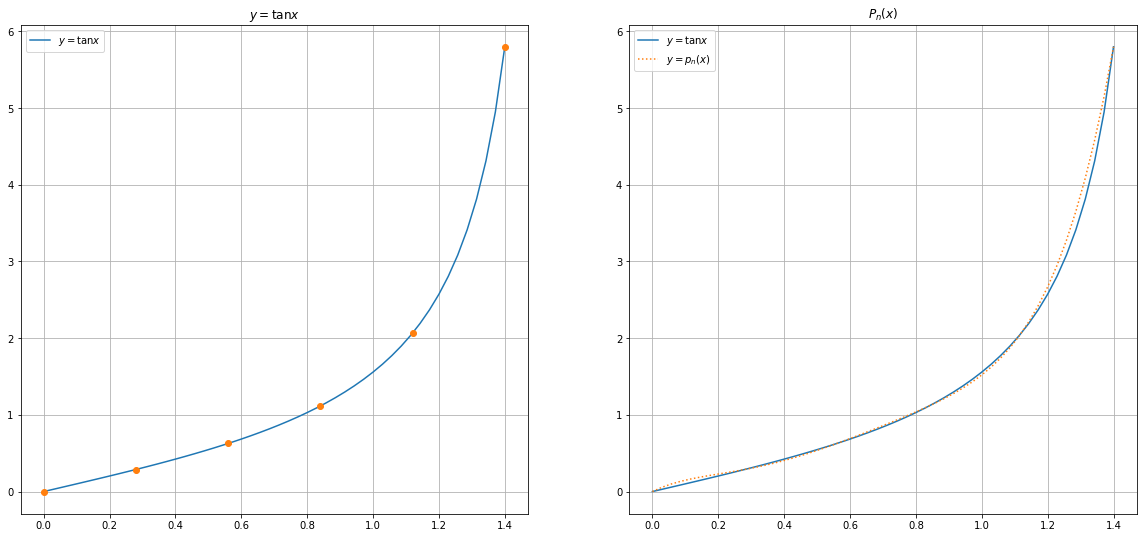

In [2]:
#Tarea (Lagrange generalizado)
def n_interp(x,X,Y):
    if len(X)!= len(Y):
        return ('Vectores con dimensiones distintas')
    else:
        Points=list(zip(X,Y)) #aquí genero los puntos, con las listas dadas por el usuario
        Lk=[] # aquí guardo los polinomios de Lagrange
        n=len(X)
        for i in range(n): #indice lento
            l=1
            for k in range(n): #indice rapido
                if k!=i: 
                    l*=(x-X[k])/float(X[i]-X[k]) #este es el polinomio k-esimo de lagrange 
            Lk.append(l)
        polinomio=0.0
        #print(Lk)
        for i in range(n):
            polinomio+=Lk[i]*Y[i]
        return polinomio


n=6 #numero de la interpolacion
X2=np.linspace(0, 1.4,n)
Y2 = np.tan(X2)
print(np.tan(1.15),n_interp(1.15,X2,Y2))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0, 1.4)
ax1.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax1.plot(X2, Y2, "o")
ax1.set_title(r"$y = \tan x$")
ax1.legend()
ax1.grid()

xr =np.linspace(0, 1.4) # np.linspace(1.08, 1.22)
yr = np.tan(xr)
ax2.set_title(r"$P_n(x)$")
ax2.plot(xr, np.tan(xr), label=r"$y = \tan x$")
ax2.plot(xr, n_interp(xr,X2,Y2), ":", label=r"$y = p_n(x)$")
ax2.legend()
ax2.grid()

# Continuación de interpolación

Usamos las librerías de sympy para que la salida de nuestros códigos tengan un fórmato más agradable
Haz la prueba de comentar las líbrerías y correr el Notebook.

Ya que seguimos declarando modulos, usemos las siguientes líneas para seguir mejorando el aspecto el notebook. Declaremos variable y parámetros para las figuras. 

In [3]:
%matplotlib inline 
# para que las figuras aparezcan incrustadas en el notebook
plt.rcParams["figure.figsize"] = [12, 9] # ancho, alto de figuras
plt.rcParams["font.size"] = 20 #tamaño de letra de las figuras

# Diferencias Divididas

La clase pasada, vimos como interpolar con polinomios de Lagrange. En este Notebook veremos otro método de interpolación llamado Diferencias Divididas que conlleva a la interpolación del polinomio de Newton. Este método tiene varias ventajas sobre  interpolar con Lagrange.

Si usamos los polinomios interpoladores de Lagrange, uno de los inconvenientes es que no hay relación de recursión entre la construcción de $P_{n-1}(x)$ y $P_{n}(x)$; cada polinomio debe construirse individualmente y el trabajo necesario para calcular polinomios de grado elevado requiere hacer muchas operaciones. 

En la clase pasada y en el Notebook 1 de Interpolación, se probo que para un conjunto de nodos, el polinomio que los intersecta es único. Por lo que no importa el método que usemos, debemos tener el mismo resultado. Así que lo mejor es usar el método que sea más eficiente computacionalmente.

Supóngase que, $P_n(x)$ es el n-ésimo polinomio de Lagrange que concuerda con la función $f$ en los nodos $x_0,x_1,\cdots,x_n$. Las diferencias divididas de $f$ respecto a $x_0,x_1,\cdots,x_n$ se usan para expresar $P_n(x)$ en la forma:

$$P_n(x)=a_0+a_1(x-x_0)+a_1(x-x_0)(x-x_1)+a_2(x-x_0)(x-x_1)+\cdots+a_n(x-x_0)(x-x_1)\cdots(x-x_{n-1})$$

El procedimiento de obtener las constantes $a_i$'s es lo que llamamos como Diferencias divididas. El orden de la diferencia dividida es el orden de la constante del polinomio

## Diferencias divididas de orden 1

Para una función $f$ y dos puntos distintos $x_0$ y $x_1$ tenemos:

$$a_0=P_n(x_0)=f(x_0)=f[x_0]$$

es *la diferencia dividida de orden cero*. 

Para $a_1$, usamos $P_n(x_1)=f(x_1)=f(x_0)+a_1(x_1-x_0)$, tal que
$$ a_1 = \frac{f(x_1) - f(x_0)}{x_1 - x_0} = f[x_0, x_1] $$
Es la *diferencia dividida de orden 1*.

Usando el teorema del valor medio:
$$ f(x_1) - f(x_0) = f'(c) (x_1 - x_0) $$
existe algún $c$ entre $x_0$ y $x_1$. Entonces
$$ f[x_0, x_1] = f'(c). $$

La diferencia dividida coincide con ser la derivada, en particular para cuando $x_0$ y $x_1$ están muy cerca. 
$$ f'\left(\frac{x_0 + x_1}{2}\right) \approx f[x_0, x_1] $$.

## Diferencias divididas de orden 2

Para tres puntos $x_0$, $x_1$ y $x_2$ definimos
$$ f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} $$
Es la *diferencia dividida de orden 2*.

Con un argumento análogo y un poco más complicado que el anterior, se puede demostrar que
$$ f[x_0, x_1, x_2] = \frac{1}{2} f''(c) $$
para un $c$ entre  $x_0$, $x_1$ y $x_2$.

Se obtiene que:
$$  f''(x_1) \approx 2 f[x_0, x_1, x_2] $$
con puntos o nodos equidistantes
$$ x_1 - x_0 = x_2 - x_1 $$

### Ejemplo

In [4]:
X3 = [1 + 0.1*i for i in range(5)] #Recuerden que aquí hacemos una lista y la vamos llenando con un for. Esta
                                   # Esta estructura es muy cómoda, hacemos todo en una línea

df_cos = pd.DataFrame([[x, np.cos(x)] for x in X3], columns=["$x$", "$\cos x$"]).transpose().style.format("{:g}")
#.transpose().style.format("{:g}") recurden que la tabla la rotamos con transpose y luego le decimos que 
# despliegue el formato de forma general (de los números de la tabla)
df_cos

,0,1,2,3,4
$x$,1,1.1,1.2,1.3,1.4
$\cos x$,0.540302,0.453596,0.362358,0.267499,0.169967


Diferencia dividida de orden uno de los primeros dos nodos
$$
f_{01}=f[x_0,x_1]=\frac{\cos(x_1)-\cos(x_0)}{(x_1-x_0)}
$$

In [5]:
f_01 = (np.cos(X3[1]) - np.cos(X3[0])) / (X3[1] - X3[0]) #hacemos la primera diferencia dividida
Math("f[x_0, x_1] = {:4g}".format(f_01))  
#la funcion math es del modulo IPython.display y aquí forzamos a Python a regresar el resultado en Latex
#y recibir latex

<IPython.core.display.Math object>

Comparamos con la derivada

In [6]:
Math(r"f'\left(\frac{{x_0 + x_1}}{{2}}\right) = - \sin(1.05) = {:4g}".format(-np.sin(1.05)))

<IPython.core.display.Math object>

Diferencia dividida de orden uno de los dos siguientes nodos
$$
f_{12}=f[x_1,x_2]=\frac{\cos(x_2)-\cos(x_1)}{(x_2-x_1)}
$$

In [7]:
f_12 = (np.cos(X3[2]) - np.cos(X3[1])) / (X3[2] - X3[1])
Math("f[x_1, x_2] = {:4g}".format(f_12))

<IPython.core.display.Math object>

Comparamos con la segunda derivada

In [8]:
Math(r"\frac{{1}}{{2}} f''(x_1) = -\frac{{1}}{{2}}\cos(1.1) = {:4g}".format(-0.5 * np.cos(1.1)))

<IPython.core.display.Math object>

¿Por qué la segunda derivada y no la primera? ¿Qué está pasando con estas comparaciones con la derivada? Explica:

In [9]:
####Respuesta

## Diferencias divididas en general

Definimos
$$ f[x_0, \dots, x_n] = \frac{f[x_1, \dots, x_n] - f[x_0, \dots, x_{n-1}]}{(x_n - x_0)} $$
con $n + 1$ puntos distintos $x_0, x_1, \dots, x_n$ con $n \geq 2$,

Podemos plantear la definicón recursiva para la *diferencia dividida del orden $n$* de $f(x)$, en términos de la derivada:
$$ f[x_0, \dots, x_n] = \frac{1}{n!}f^{(n)}(c)$$
para una $c$ en el intervalo $I$ de
$$ I = [\min\{x_0, \dots, x_n\}, \max\{x_0, \dots, x_n\}] $$

Nota: Utilizamos la notación
$ D^k f(x_i) := f[x_i, \dots, x_{i+k}]$

### Paréntesis de Python
Como quiero que salgan bien las siguientes tablas y se note como las diferencias divididas son recursivas entre sí, usaré lo siguiente:

In [10]:
#https://pymotw.com/2/collections/namedtuple.html
#Generalmente, podemos manipular los tuples de la siguiente forma

## Definimos tuples
bob = ('Bob', 30, 'male')
print('Representation:', bob)
jane = ('Jane', 29, 'female')
print('\nField by index:', jane[0])

## Desempaquetamos tuples
print ('\nFields by index:')
for p in [ bob, jane ]:
    print ('%s is a %d year old %s' % p)
    
###Pero, existe un modulo llamado collections, que me ayuda a trabajar de forma sencilla con tuples y formar colecciones 
import collections
Person = collections.namedtuple('Person', 'name age gender')
#generamos una tupla con un alias o con una clave y cada alias tiene un valor (las colecciones son parecidas a los diccionarios)
bob = Person(name='Bob', age=30, gender='male')
print ('\nRepresentation:', bob)

jane = Person(name='Jane', age=29, gender='female')
print('\nField by name:', jane.name)

print('\nFields by index:')
for p in [ bob, jane ]:
    print ('%s is a %d year old %s' % p)
    

Representation: ('Bob', 30, 'male')

Field by index: Jane

Fields by index:
Bob is a 30 year old male
Jane is a 29 year old female

Representation: Person(name='Bob', age=30, gender='male')

Field by name: Jane

Fields by index:
Bob is a 30 year old male
Jane is a 29 year old female


Usemos collections para acortar una forma de usar funciones y evaluarlas en la misma línea, con partial

In [11]:
from collections import namedtuple 
#namedtuple() funcion que permite hacer colecciones con tublas dadas
from itertools import zip_longest
# zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D- --> #funcion dada para acomodar valores juntos
from functools import partial
#ejemplo de partial
  
# función normal 
def f(a, b, c, x): 
    return 1000*a + 100*b + 10*c + x 
  
# una función parcial que llama a f con 
# a = 3, b = 1 y c = 4. 
g = partial(f, 3, 1, 4) 
print(g(5)) 

3145


## Forma de Newton: Polinomio de diferencias divididas

Usando las diferencias divididas, el polinomio de la interpolación queda:
\begin{align}
P_1(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
P_2(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
  &\qquad {} + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
  &= P_1(x)  + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
\end{align}
Generalizando:
\begin{gather}
\deg(P_n) \le n\\
P(x_i) = y_i, \qquad i = 0, 1, \dots, n
\end{gather}
obtenemos
\begin{align}
P_n(x) &= f(x_0) + f[x_0, x_1](x - x_0)\\
  &\qquad {} + f[x_0, x_1, x_2](x - x_0) (x - x_1)\\
  &\qquad {} + f[x_0, x_1, x_2, x_3](x - x_0) (x - x_1) (x - x_2)\\
  & \qquad {} + \dots\\
  &\qquad {} + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})\\
\end{align}
Nos da la relación de recursión
$$
P_n(x) = P_{n - 1}(x) + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})
$$
donde $P_{n - 1}(x)$ interpola $f(x)$ en los puntos en $\{x_1, \dots, x_{n - 1}\}$

In [12]:
##Tabla de diferencias divididas

f_i = [np.cos(X3[i]) for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i]) / (X3[i+1] - X3[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X3[i+2] - X3[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X3[i+3] - X3[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X3[i+4] - X3[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii)), 
          index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])
#print(ffdat)
ffdat.insert(0, "$x_i$", X3) #list.insert(index, element)
ffdat
#ffdat.style.format(dict(zip(ffdat.columns, ["{:3.1f}"] + 5*[partial(nan_sp, fmt="{:7.5f}")])))

,$x_i$,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1.0,0.540302,-0.867062,-0.226609,0.151937,0.015073
1,1.1,0.453596,-0.912384,-0.181028,0.157967,NaN
2,1.2,0.362358,-0.948589,-0.133638,NaN,NaN
3,1.3,0.267499,-0.975317,NaN,NaN,NaN
4,1.4,0.169967,NaN,NaN,NaN,NaN


Obtenemos
\begin{align}
P_1(x) &= 0.5403 - 0.86706 (x - 1)\\
P_2(x) &= P_1(x) - 0.22661 (x - 1) (x - 1.1)\\
P_3(x) &= P_2(x) + 0.15194 (x - 1) (x - 1.1) (x - 1.2)\\
P_4(x) &= P_3(x) +0.01507 (x - 1) (x - 1.1) (x - 1.2) (x - 1.3)\\
\end{align}

In [13]:
x = 1.05
exacto = np.cos(x)
print("{:10.8e}".format(exacto))

P = {}
# Extrar el primer renglon de la tabla iloc vive en pandas
r0 = ffdat.iloc(0)[0]

P[1] = r0[1] + r0[2] * (x - 1)
P[2] = P[1] + r0[3] * (x - 1) * (x - 1.1)
P[3] = P[2] + r0[4] * (x - 1) * (x - 1.1) * (x - 1.2)
P[4] = P[3] + r0[5] * (x - 1) * (x - 1.1) * (x - 1.2) * (x - 1.3)

PE = dict([(i, exacto - P[i]) for i in range(1, 5)])
pd.DataFrame([P,PE], index=["$P_n(x)$", "Error"])

4.97571048e-01


,1,2,3,4
$P_n(x)$,0.496949,0.497516,0.497573,4.975713e-01
Error,0.000622,0.000055,-0.000002,-2.519410e-07


### Nota
Por unicidad, se sabe que el polinomio que interpola $f(x)$ entre $n$ puntos $x_i$ es único. Entonces, los métodos de Lagrange y Newton encuentran el mismo polinomio. Las ventajas de los polinomios de Newton son:
- Se puede encontrar un polinomio de mayor orden sin tener que re-hacer el polinomio completo (usamos recursividad).
- Es más fácil estimar el error de interpolación usando polinomios de Newton.

## Error en interpolación lineal

Sea $P_1(x)$ el polinomio lineal que interpola a $f(x)$ entre $x_0$ y $x_1$. ¿Cuál es el error $f(x) - P_1(x)$?

Suponemos que $f(x)$ tiene dos derivadas continuas en el intervalo $[a, b]$, que contiene a los puntos $\{x_0, x_1\}$. En este caso tenemos para $a \le x \le b$:
$$
f(x) - P_1(x) = \frac{(x - x_0)(x - x_1)}{2} f''(c_x)
$$
con $c_x$ entre los minimos y maximos de $\{x, x_0, x_1\}$.

Con $x_1$ y $x$ cerca de $x_0$ tenemos
$$
f(x) - P_1(x) \approx \frac{(x - x_0)(x - x_1)}{2} f''(x_0)
$$
El error se comparta como polinomio cuadrático con ceros en $x_0$ y $x_1$.

### Ejemplo

Usamos $f(x) = \log_{10} x$. En tablas de logaritmos aparecen valores para argumentos entre $1$ y $10$. Entonces trabajamos con $1 \le x, x_0, x_1 \le 10$. Para tener el problema bien definido suponemos además $x_0 < x_1$ y definimos $h = x_1 - x_0$. Con eso tenemos
$$
f''(x) = -\frac{\log_{10}e}{x^2}
$$
\begin{align}
\log_{10}x - P_1(x) &= \frac{(x - x_0)(x - x_1)}{2} \left[ -\frac{\log_{10}e}{c_x^2} \right]\\
     &= (x - x_0)(x_1 - x) \left[ \frac{\log_{10}e}{2c_x^2} \right]\\
\end{align}
En interpolación tenemos típicamente $x_0 \le x \le x_1$. En este casos tenemos
$$
(x - x_0)(x_1 - x) \ge 0, \qquad x_0 \le c_x \le x_1
$$


$$
(x - x_0)(x_1 - x) \ge 0, \qquad x_0 \le c_x \le x_1
$$
y por eso 
\begin{gather}
(x - x_0)(x_1 - x) \left[ \frac{\log_{10}e}{2x_1^2} \right] \le \log_{10}x - P_1(x) \\
{}\le (x - x_0)(x_1 - x) \left[ \frac{\log_{10}e}{2x_0^2} \right]
\end{gather}
En el caso donde $h = x_1 - x_0$ pequeño obtenemos para $x_0 \le x \le x_1$
$$
\log_{10}x - P_1(x) \approx (x - x_0)(x_1 - x) \left[ \frac{\log_{10}e}{2x_0^2} \right]
$$

Tablas de $\log_{10} x$ tienen tipicamente $h = 0.01$. En este caso, estimamos el error 
$$
0 \le \log_{10}x - P_1(x)  \le  (x - x_0)(x_1 - x) \left[ \frac{\log_{10}e}{2x_0^2} \right]
$$
De geometría obtenemos
$$
\max_{x_0 \le x \le x_1} (x - x_0)(x_1 - x) \le \frac{h^2}{4}
$$
Entonces 
$$
0 \le \log_{10}x - P_1(x)  \le \frac{h^2}{4} \left[ \frac{\log_{10}e}{2x_0^2} \right] 
  \approx 0.0543\frac{h^2}{x_0^2}
$$

Para una cota uniforme usamos el valor minimo para $x_0$, maximizando la cota superior:
\begin{gather}
0 \le \log_{10}x - P_1(x)  \le \frac{h^2 \log_{10}e}{8} \approx 0.0543 h^2 \\
0 \le \log_{10}x - P_1(x)  \le  0.0543 h^2 \\
\end{gather}
Para nuestro $h = 0.01$ obtenemos
$$
0 \le \log_{10}x - P_1(x)  \le  5.43 \times 10^{-6} 
$$

En tablas los valores están tipicamente listados con cuatro digitos decimales, por ejemplo
$$
\log_{10} 5.41 \approx 0.7332
$$
Entonces los valores dados tienen un error hasta $0.00005$. En comparación con el error de la interpolación notamos que el error dominante es el error de redondeo en las tablas.

De la cota
$$
0 \le \log_{10}x - P_1(x)  \le \frac{h^2 \log_{10}e}{8x_0^2} \approx 0.0543\frac{h^2}{x_0^2}
$$
vemos que el error baja para $x_0$ más grande. El error es aproximadamente $100$ veces menor para puntos cerca de $10$ que para puntos cerca de $1$.

## Ejercicio. 

Sea $f(x)=x^3-4x$. Construye la tabla de diferencias divididas, usando los códigos de este Notebook (DataFrame y Partial) para los nodos $x_0=1, x_1=2, \cdots, x_5=6$ 